In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_data.shape

(8693, 14)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [10]:
for i in train_data.columns:
    print(i,"-",train_data[i].unique(),"-",train_data[i].nunique())

PassengerId - ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] - 8693
HomePlanet - ['Europa' 'Earth' 'Mars' nan] - 3
CryoSleep - [False True nan] - 2
Cabin - ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] - 6560
Destination - ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] - 3
Age - [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] - 80
VIP - [False True nan] - 2
RoomService - [   0.  109.   43. ... 1569. 8586.  745.] - 1273
FoodCourt - [   0.    9. 3576. ... 3208. 6819. 4688.] - 1507
ShoppingMall - [   0.   25.  371. ... 1085.  510. 1872.] - 1115
Spa - [   0.  549. 6715. ... 2868. 1107. 1643.] - 1327
VRDeck - [   0.   44.   49. ... 1164.  971. 3235.] - 1306
Name - ['Maham Ofra

In [11]:
train_data.duplicated().sum()

0

In [12]:
ls = ['FoodCourt','ShoppingMall','Spa','VRDeck']
for i in ls:
    train_data[i] = train_data[i].astype('float64')

In [13]:
train_data.corr()

/tmp/ipykernel_32/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


## Age is highly coorelated with Spa,Food Court and VRDeck

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='HomePlanet', ylabel='count'>

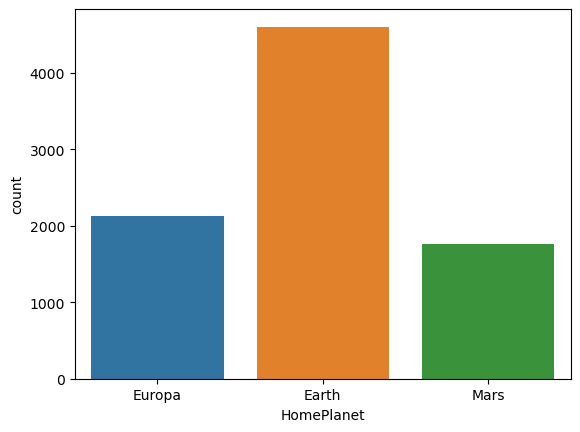

In [15]:
sns.countplot(x = train_data['HomePlanet'])

### More than half of the population was from Earth

In [16]:
train_data['HomePlanet'].isnull().sum()

201

### Around 201 values are missing in the HomePlanet column. So we have to find a way to impute these missing values.So we're replacing all the null values with the most occuring category which is Earth.


In [17]:
train_data['HomePlanet'].fillna('Earth',inplace = True)

<Axes: xlabel='CryoSleep', ylabel='count'>

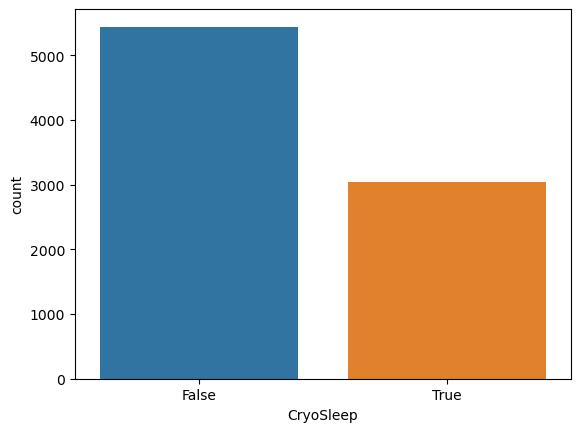

In [18]:
sns.countplot(x = train_data['CryoSleep'])

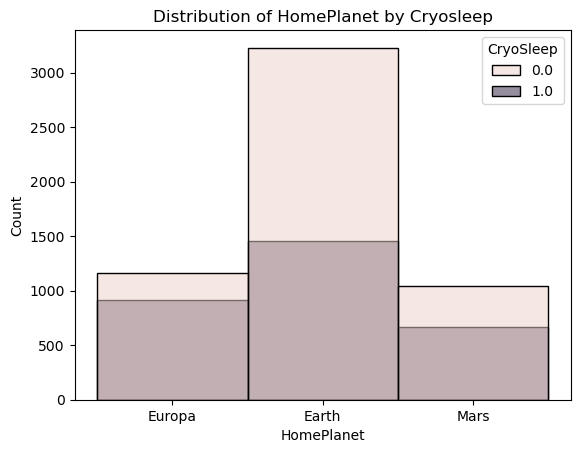

In [19]:
sns.histplot(data = train_data , x = 'HomePlanet' , hue = 'CryoSleep' , )
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Distribution of HomePlanet by Cryosleep')
plt.show()


### Many of the passengers didn't opted for cryosleep.Let's see if there any relationship between Age and the people who took cryo sleep

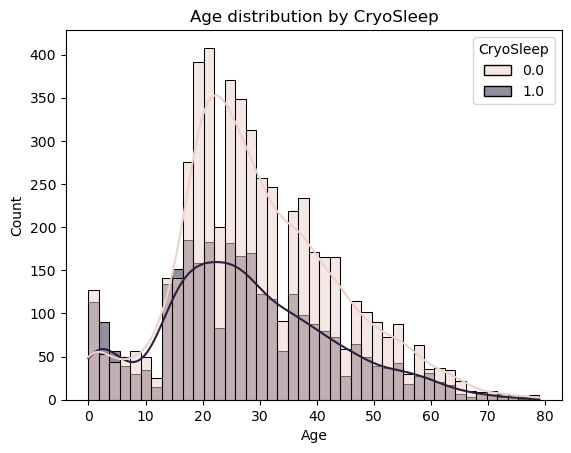

In [20]:
sns.histplot(data=train_data, x='Age', hue='CryoSleep', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by CryoSleep')
plt.show()

In [21]:
train_data['CryoSleep'].mode()

0    False
Name: CryoSleep, dtype: object

In [22]:
train_data['CryoSleep'].fillna(0 , inplace = True)

In [23]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [24]:
train_data['Cabin'].fillna(method = 'bfill',inplace = True)

<Axes: xlabel='Destination', ylabel='count'>

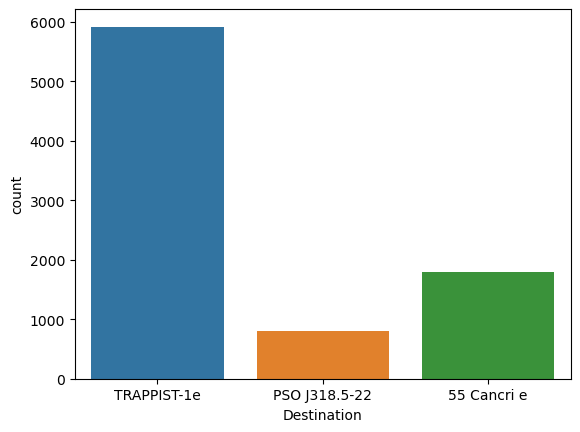

In [25]:
sns.countplot(x = train_data['Destination'])

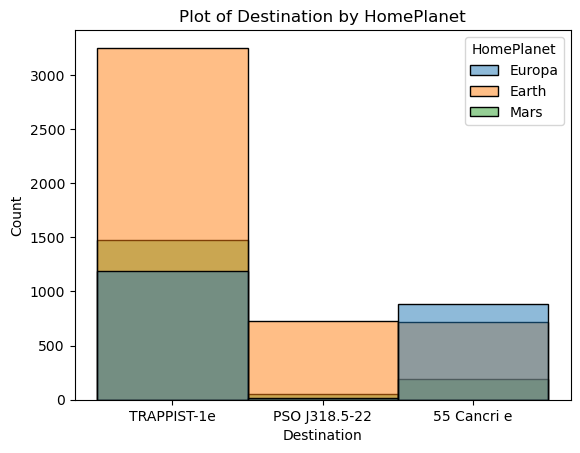

In [26]:
sns.histplot(data = train_data , x = 'Destination' , hue = 'HomePlanet' )
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Plot of Destination by HomePlanet')
plt.show()

In [27]:
print(train_data['Destination'].mode())
train_data['Destination'].fillna(train_data['Destination'].mode,inplace = True)

0    TRAPPIST-1e
Name: Destination, dtype: object


<Axes: xlabel='Age'>

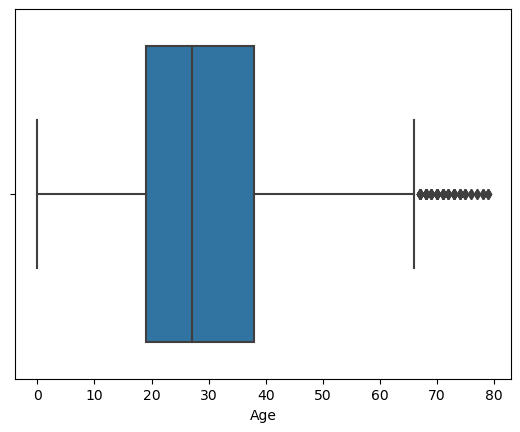

In [28]:
sns.boxplot(x = train_data['Age'])

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

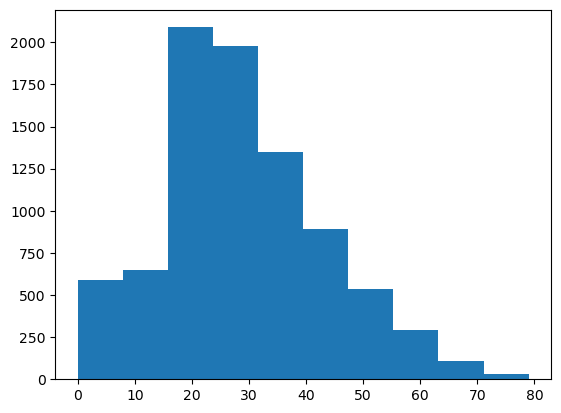

In [29]:
plt.hist(x = train_data['Age'])

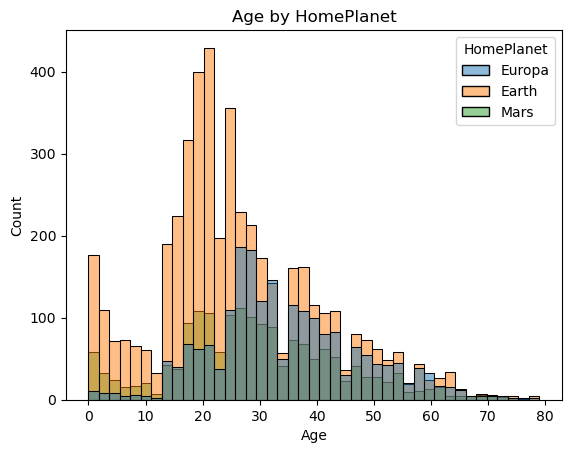

In [30]:
sns.histplot(data = train_data , x = 'Age' , hue = 'HomePlanet')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age by HomePlanet')
plt.show()

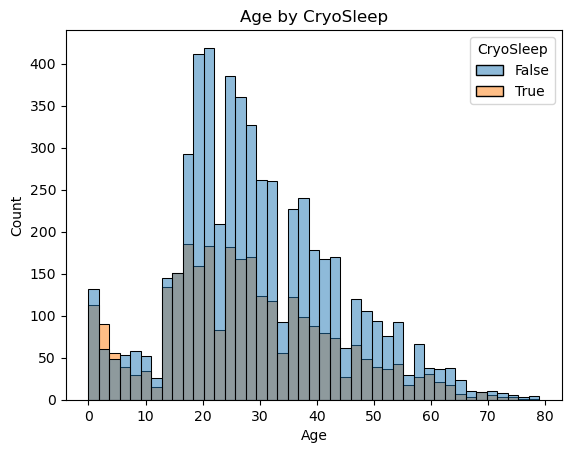

In [31]:
sns.histplot(data = train_data , x = 'Age' , hue = 'CryoSleep')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age by CryoSleep')
plt.show()

## Let's replace the missing Age values by the mean of the Age

In [32]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace = True)

(array([ 591.,  649., 2089., 2155., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

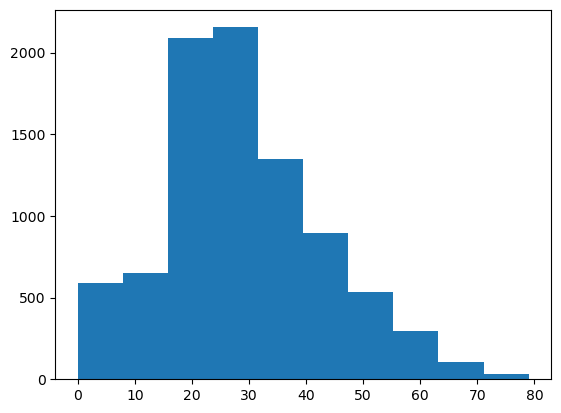

In [33]:
plt.hist(x = train_data['Age'])

<Axes: xlabel='VIP', ylabel='count'>

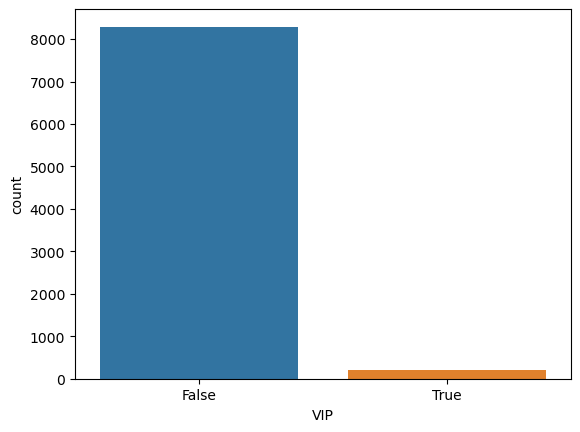

In [34]:
sns.countplot(x = train_data['VIP'])

In [35]:
train_data['VIP'].fillna(False,inplace = True)

In [36]:
train_data['VIP'].isnull().sum()

0

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [38]:
train_data.corr()

/tmp/ipykernel_32/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.091574,0.068368,0.129282,0.033031,0.122159,0.100341,-0.074249
VIP,0.091574,1.000000,0.057173,0.127936,0.018720,0.060888,0.124351,-0.037261
RoomService,0.068368,0.057173,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.129282,0.127936,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033031,0.018720,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.122159,0.060888,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.100341,0.124351,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.074249,-0.037261,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


(array([7083.,  496.,  369.,  195.,  103.,   79.,   44.,   38.,   24.,
          18.]),
 array([   0.,  350.,  700., 1050., 1400., 1750., 2100., 2450., 2800.,
        3150., 3500.]),
 <BarContainer object of 10 artists>)

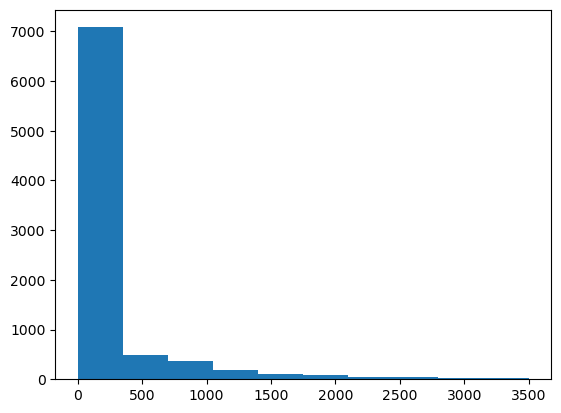

In [39]:
plt.hist(x = train_data['RoomService'], range = [0,3500])

In [40]:
train_data['RoomService'].fillna(train_data['RoomService'].median(),inplace = True)

In [41]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


Text(0, 0.5, 'Number of passengers')

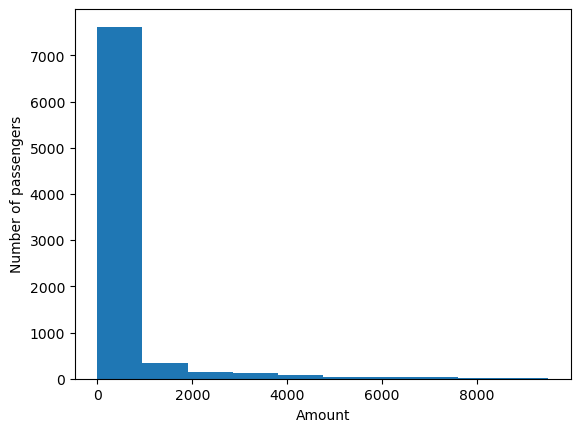

In [43]:
plt.hist(x = train_data['FoodCourt'],range = [0,9500],bins = 10)
plt.xlabel('Amount')
plt.ylabel('Number of passengers')

<Axes: >

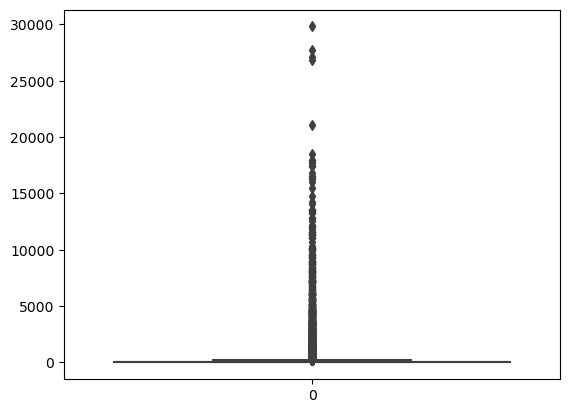

In [44]:
sns.boxplot(train_data['FoodCourt'])

In [45]:
train_data['FoodCourt'].mode()

0    0.0
Name: FoodCourt, dtype: float64

In [46]:
train_data['FoodCourt'].fillna(train_data['FoodCourt'].median(), inplace = True)

In [47]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

(array([6918.,  254.,  211.,  173.,  214.,  180.,  145.,   62.,   46.,
          37.]),
 array([   0.,  140.,  280.,  420.,  560.,  700.,  840.,  980., 1120.,
        1260., 1400.]),
 <BarContainer object of 10 artists>)

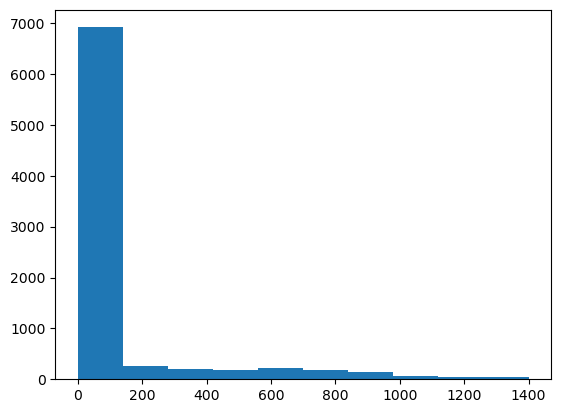

In [48]:
plt.hist(x = train_data['ShoppingMall'],range = [0,1400])

In [49]:
train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median(),inplace = True)

(array([8.204e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <BarContainer object of 10 artists>)

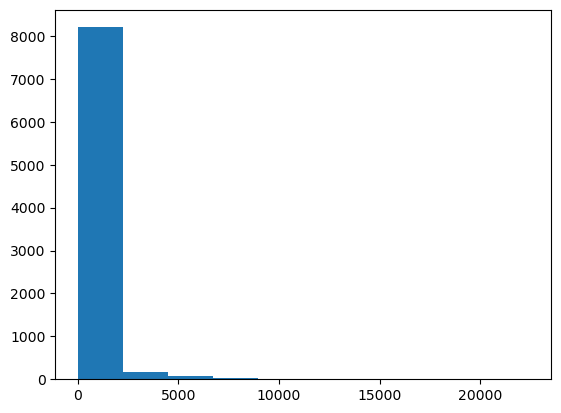

In [50]:
plt.hist(x = train_data['Spa'])

In [51]:
train_data['Spa'].fillna(train_data['Spa'].median(),inplace = True)

(array([8.252e+03, 1.360e+02, 6.000e+01, 2.600e+01, 1.800e+01, 7.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2413.3,  4826.6,  7239.9,  9653.2, 12066.5, 14479.8,
        16893.1, 19306.4, 21719.7, 24133. ]),
 <BarContainer object of 10 artists>)

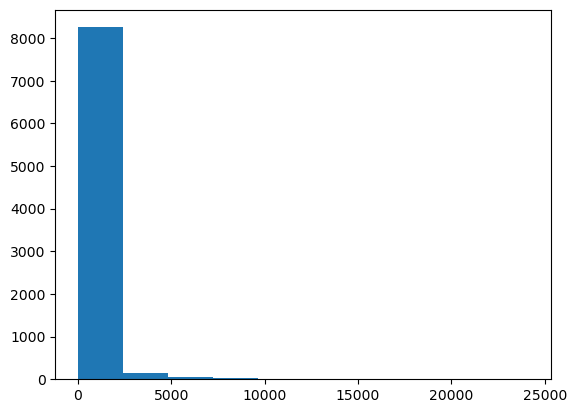

In [52]:
plt.hist(x = train_data['VRDeck'])

In [53]:
train_data['VRDeck'].fillna(train_data['VRDeck'].median(),inplace = True)
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [54]:
train_data.drop('Name',axis  =1 ,inplace = True)

In [55]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## All the missing values have been dealt with

In [56]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(5)
memory usage: 764.2+ KB


In [57]:
categorical_col = ['Cabin','HomePlanet','CryoSleep','Destination','VIP','Transported']
from sklearn.preprocessing import OneHotEncoder
for i in categorical_col:
    train_data[i] = train_data[i].astype('category')
    train_data[i] = train_data[i].cat.codes 
    

In [58]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,149,3,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,0,0,2184,3,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,1,0,1,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,1,0,1,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,0,0,2186,3,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [59]:
target = train_data['Transported']
train_data.drop('Transported',axis = 1 ,inplace = True)


/tmp/ipykernel_32/2676779144.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr() ,annot = True , linewidths = .3)


<function matplotlib.pyplot.show(close=None, block=None)>

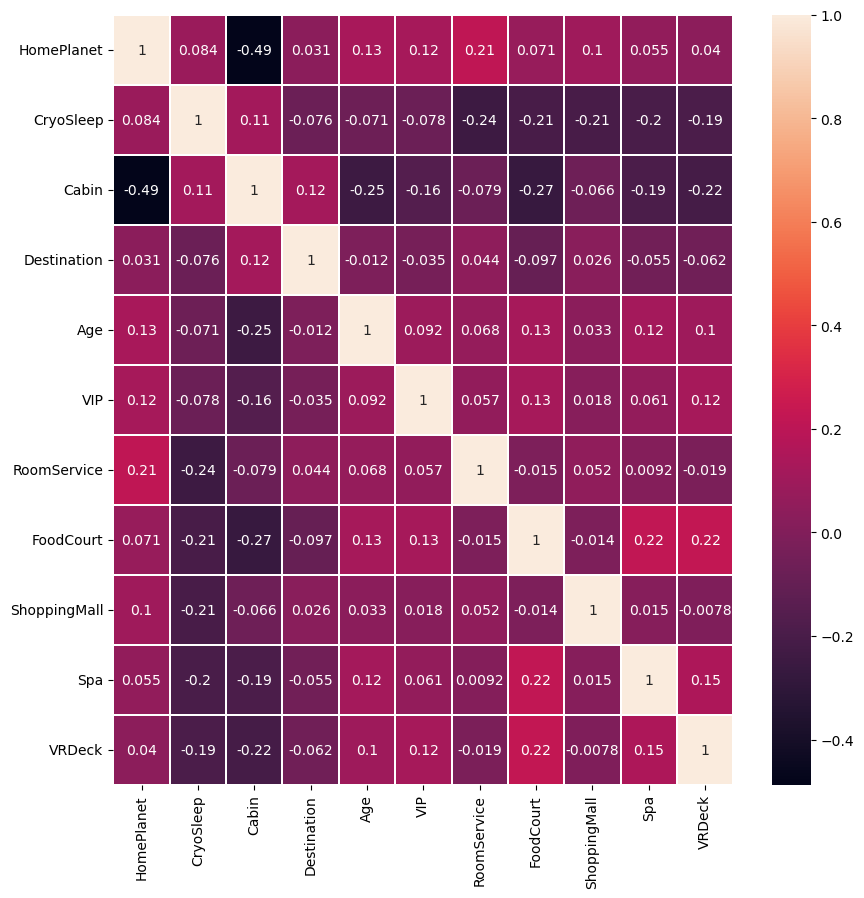

In [60]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr() ,annot = True , linewidths = .3)
plt.show

## Now we want variables which are less Correlated with each other

In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_data,target)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(target,lr.predict(train_data)))
print('Accuracy score -',accuracy_score(target,lr.predict(train_data)))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      4315
           1       0.74      0.85      0.79      4378

    accuracy                           0.77      8693
   macro avg       0.78      0.77      0.77      8693
weighted avg       0.78      0.77      0.77      8693

Accuracy score - 0.7707350741976303


In [63]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [64]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [65]:
test_data.drop('Name',axis = 1,inplace = True )

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
dtypes: float64(6), object(6)
memory usage: 401.1+ KB


<Axes: xlabel='HomePlanet', ylabel='count'>

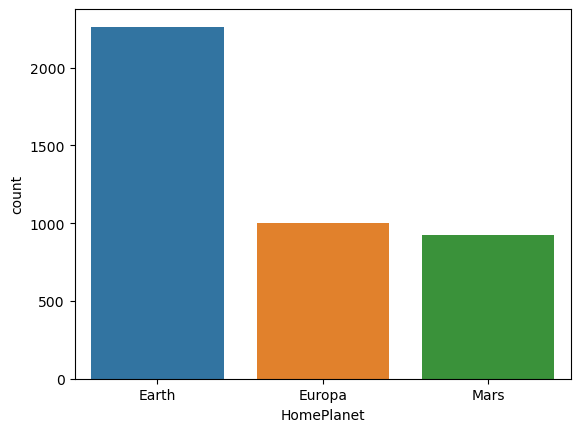

In [67]:
sns.countplot(x = test_data['HomePlanet'])


In [68]:
test_data['HomePlanet'].fillna('Earth',inplace = True)

<Axes: xlabel='CryoSleep', ylabel='count'>

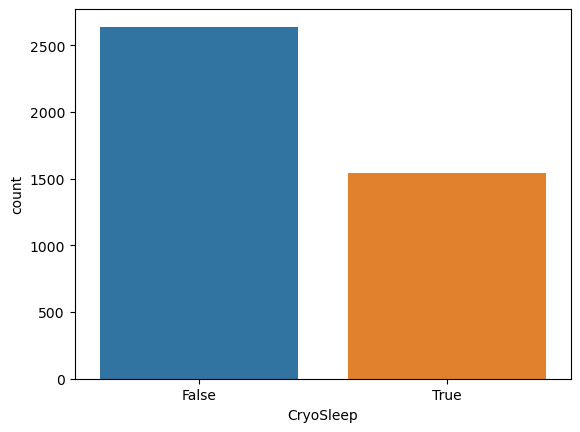

In [69]:
sns.countplot(x = test_data['CryoSleep'])

In [70]:
test_data['CryoSleep'].fillna(False,inplace = True)

In [71]:
test_data['Cabin'].fillna(method = 'bfill',inplace = True)

In [72]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

<Axes: xlabel='Destination', ylabel='count'>

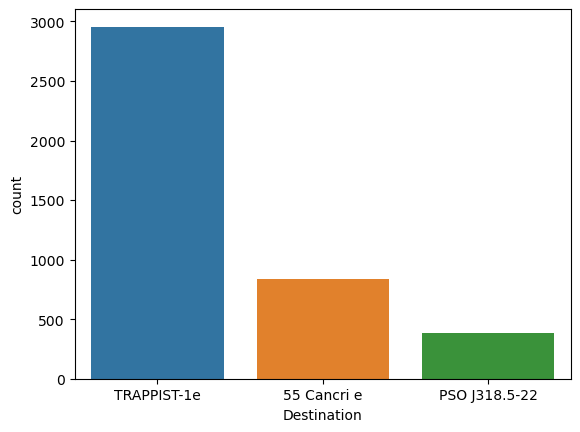

In [73]:
sns.countplot(x = test_data['Destination'])

In [74]:
test_data['Destination'].fillna(test_data['Destination'].mode , inplace = True)

<Axes: xlabel='VIP', ylabel='count'>

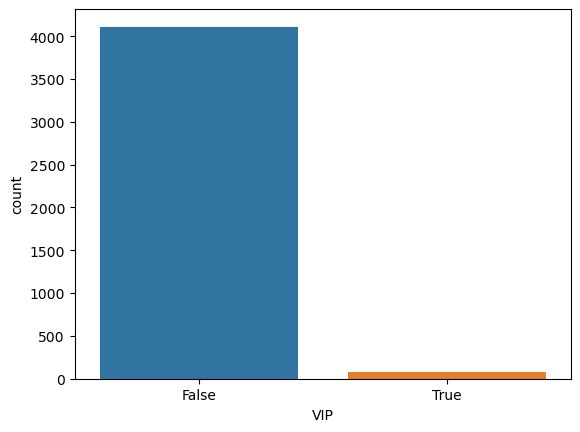

In [75]:
sns.countplot(x = test_data['VIP'])

In [76]:
test_data['VIP'].fillna(False , inplace = True)

<Axes: xlabel='Age', ylabel='Count'>

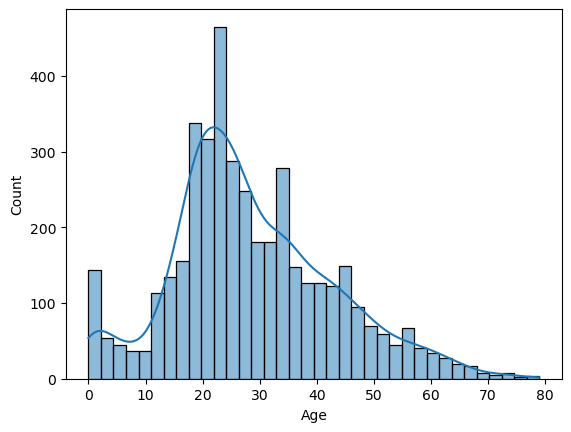

In [77]:
sns.histplot(x = test_data['Age'],kde = True)

In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
dtypes: bool(2), float64(6), object(4)
memory usage: 342.6+ KB


In [79]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace = True)

In [80]:
test_data['Age'].astype(int)

0       27
1       19
2       31
3       38
4       20
        ..
4272    34
4273    42
4274    28
4275    28
4276    43
Name: Age, Length: 4277, dtype: int64

In [81]:
test_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

(array([3.94e+03, 1.84e+02, 4.20e+01, 1.70e+01, 7.00e+00, 3.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([    0. ,  1156.7,  2313.4,  3470.1,  4626.8,  5783.5,  6940.2,
         8096.9,  9253.6, 10410.3, 11567. ]),
 <BarContainer object of 10 artists>)

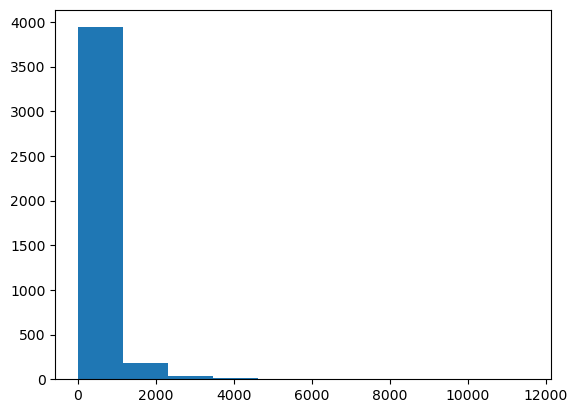

In [82]:
plt.hist(x = test_data['RoomService'])

In [83]:
test_data['RoomService'].fillna(test_data['RoomService'].median(),inplace = True)

(array([3.964e+03, 1.160e+02, 4.900e+01, 2.200e+01, 1.200e+01, 0.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([    0. ,  2527.3,  5054.6,  7581.9, 10109.2, 12636.5, 15163.8,
        17691.1, 20218.4, 22745.7, 25273. ]),
 <BarContainer object of 10 artists>)

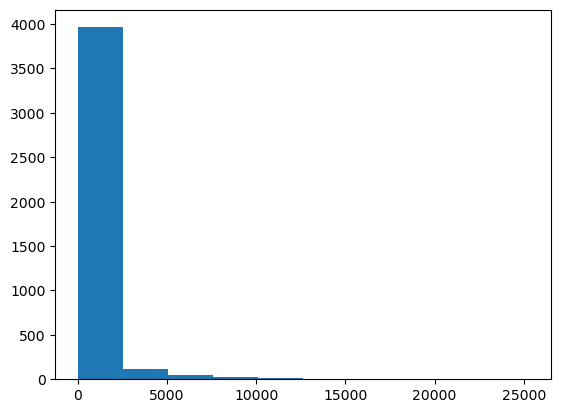

In [84]:
plt.hist(x = test_data['FoodCourt'])

In [85]:
test_data['FoodCourt'].fillna(test_data['FoodCourt'].median(),inplace=True)
test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].median(),inplace=True)
test_data['Spa'].fillna(test_data['Spa'].median(),inplace=True)
test_data['VRDeck'].fillna(test_data['VRDeck'].median(),inplace = True)

In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   bool   
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   bool   
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
dtypes: bool(2), float64(6), object(4)
memory usage: 342.6+ KB


In [87]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [88]:
categorical_col = ['Cabin','HomePlanet','CryoSleep','Destination','VIP']
for i in categorical_col:
    test_data[i] = test_data[i].astype('category')
    test_data[i] = test_data[i].cat.codes 

In [89]:
Id = test_data['PassengerId']

In [90]:
predictions = lr.predict(test_data)
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int8)

In [98]:
submission_csv = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submission_csv

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [103]:
submission_csv['Transported'] = predictions
submission_csv['Transported'] = submission_csv['Transported'].astype(bool)

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273     True
4274     True
4275     True
4276     True
Name: Transported, Length: 4277, dtype: bool

In [104]:
submission_csv.to_csv('/kaggle/working/submission.csv', index=False)
submission_csv.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
